## ENVECON 147

In this assignment, we will work with the electricity market data that we will use in the Electricity Strategy game to learn how to use the data to create an electricity supply curve, how to determine the market clearing price for a given demand, and how a tax on CO2 emissions will affect the supply curve and price.

1. Load in Pandas, Numpy, and Pyplot from Matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2. Import the file ESGPortfolios.csv as a Pandas dataframe.  Save it as ESG.  Display the first few rows.

In [2]:
ESG = pd.read_csv('ESGPorfolios.csv')
display(ESG.head())

,Group,Group_num,UNIT NAME,Capacity_MW,Fuel_Cost_USDperMWH,Var_OandM_USDperMWH,Total_Var_Cost_USDperMWH,Carbon_tonsperMWH,FixedCst_OandM_perDay,Plant_ID
0,Big Coal,1,FOUR CORNERS,1900,35.00,1.5,36.50,1.10,8000,11
1,Big Coal,1,ALAMITOS 7,250,72.22,1.5,73.72,0.85,0,12
2,Big Coal,1,HUNTINGTON BEACH 1&2,300,39.00,1.5,40.50,0.46,2000,13
3,Big Coal,1,HUNTINGTON BEACH 5,150,65.00,1.5,66.50,0.77,2000,14
4,Big Coal,1,REDONDO 5&6,350,40.44,1.5,41.94,0.48,3000,15


3. Capacity_MW is the quantity that each plant can produce.  Total_Var_Cost_USDperMWH is the price at which the plant produces.  In order to create a supply curve, we will need to order our plants from lowest to highest cost.  Sort the dataframe on Total_Var_Cost_USDperMWH from lowest to highest.  Display the first few rows.

In [3]:
ESG.sort_values('Total_Var_Cost_USDperMWH', ascending=True, ignore_index=True, inplace=True)
display(ESG.head())

,Group,Group_num,UNIT NAME,Capacity_MW,Fuel_Cost_USDperMWH,Var_OandM_USDperMWH,Total_Var_Cost_USDperMWH,Carbon_tonsperMWH,FixedCst_OandM_perDay,Plant_ID
0,Old Timers,7,BIG CREEK,1000,0.00,0.0,0.00,0.00,15000,61
1,Fossil Light,8,HELMS,800,0.00,0.5,0.50,0.00,15000,72
2,Fossil Light,8,DIABLO CANYON 1,1000,7.50,4.0,11.50,0.00,20000,75
3,Bay Views,4,MOSS LANDING 7,750,31.06,1.5,32.56,0.37,8000,34
4,Bay Views,4,MOSS LANDING 6,750,31.06,1.5,32.56,0.37,8000,33


4. Now, we will need to determine how much quantity is available for each price. For any price p, a plant will produce if its cost is smaller than p.  Then for any price, the quantity supplied will be equal to the capacity of all plants with a cost less than or equal to p.  Let's treat the cost in each row of our dataframe as a possible price.  We will create a new column which will equal the total quantity supplied at that price.

    Since the plants are sorted from lowest to highest cost, we just need to sum up the capacity of all plants up until and including the current row.  We can use numpy's cumsum() function to get the cumulative sum of a list.  Use np.cumsum() on ESG['Capacity_MW'] and add this to ESG as a new column called 'Cumulative_Capacity'.  Display the first few rows.

In [4]:
ESG['Cumulative_Capacity'] = np.cumsum(ESG['Capacity_MW'])
display(ESG.head())

,Group,Group_num,UNIT NAME,Capacity_MW,Fuel_Cost_USDperMWH,Var_OandM_USDperMWH,Total_Var_Cost_USDperMWH,Carbon_tonsperMWH,FixedCst_OandM_perDay,Plant_ID,Cumulative_Capacity
0,Old Timers,7,BIG CREEK,1000,0.00,0.0,0.00,0.00,15000,61,1000
1,Fossil Light,8,HELMS,800,0.00,0.5,0.50,0.00,15000,72,1800
2,Fossil Light,8,DIABLO CANYON 1,1000,7.50,4.0,11.50,0.00,20000,75,2800
3,Bay Views,4,MOSS LANDING 7,750,31.06,1.5,32.56,0.37,8000,34,3550
4,Bay Views,4,MOSS LANDING 6,750,31.06,1.5,32.56,0.37,8000,33,4300


5. Now, create a supply curve!  Plot a scatterplot with price (cost) as a function of quantity (cumulative capacity). (We will see later that the actual supply curve is a step-function.)

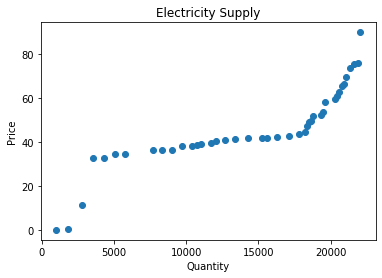

In [5]:
plt.scatter(x = ESG['Cumulative_Capacity'], y = ESG['Total_Var_Cost_USDperMWH'])
plt.title('Electricity Supply')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()

6. Now suppose demand were perfectly inelastic, equal to 14300MWH.  Display the row containing the market clearing price.  You can find this by indexing the ESG dataframe with the row index ESG['Cumulative_Capacity']==14300.

In [6]:
display(ESG[ESG['Cumulative_Capacity']==14300])

,Group,Group_num,UNIT NAME,Capacity_MW,Fuel_Cost_USDperMWH,Var_OandM_USDperMWH,Total_Var_Cost_USDperMWH,Carbon_tonsperMWH,FixedCst_OandM_perDay,Plant_ID,Cumulative_Capacity
18,Big Gas,2,ENCINA,950,41.17,0.5,41.67,0.49,2000,25,14300
